# Appendix: Working with missing data

[Vir](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

In [2]:
import pandas as pd
import numpy as np

In this section, we will discuss missing (also referred to as NA) values in pandas.

> Note: The choice of using NaN internally to denote missing data was largely for simplicity and performance reasons. It differs from the MaskedArray approach of, for example, scikits.timeseries. We are hopeful that NumPy will soon be able to provide a native NA type solution (similar to R) performant enough to be used in pandas.

See the cookbook for some advanced strategies.

## Values considered “missing”

As data comes in many shapes and forms, pandas aims to be flexible with regard to handling missing data. While NaN is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object. In many cases, however, the Python None will arise and we wish to also consider that “missing” or “not available” or “NA”.

> Note: If you want to consider inf and -inf to be “NA” in computations, you can set pandas.options.mode.use_inf_as_na = True.

In [3]:
df = pd.DataFrame(np.random.randn(5, 3),   
                  index=['a', 'c', 'e', 'f', 'h'],
                  columns=['one', 'two', 'three'])

In [4]:
df

,one,two,three
a,0.907024,-0.390815,-0.688958
c,-0.013290,0.466236,-0.873949
e,1.254899,-0.224577,0.988428
f,0.537016,0.067570,-0.428426
h,0.079991,-0.198870,-1.331309


In [5]:
df['four'] = 'bar'

In [6]:
df

,one,two,three,four
a,0.907024,-0.390815,-0.688958,bar
c,-0.013290,0.466236,-0.873949,bar
e,1.254899,-0.224577,0.988428,bar
f,0.537016,0.067570,-0.428426,bar
h,0.079991,-0.198870,-1.331309,bar


In [7]:
df['five'] = df['one'] > 0

In [8]:
df

,one,two,three,four,five
a,0.907024,-0.390815,-0.688958,bar,True
c,-0.013290,0.466236,-0.873949,bar,False
e,1.254899,-0.224577,0.988428,bar,True
f,0.537016,0.067570,-0.428426,bar,True
h,0.079991,-0.198870,-1.331309,bar,True


In [9]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

In [10]:
df2

,one,two,three,four,five
a,0.907024,-0.390815,-0.688958,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,-0.013290,0.466236,-0.873949,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,1.254899,-0.224577,0.988428,bar,True
f,0.537016,0.067570,-0.428426,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,0.079991,-0.198870,-1.331309,bar,True


To make detecting missing values easier (and across different array dtypes), pandas provides the isna() and notna() functions, which are also methods on Series and DataFrame objects:

In [11]:
df2['one']

a    0.907024
b         NaN
c   -0.013290
d         NaN
e    1.254899
f    0.537016
g         NaN
h    0.079991
Name: one, dtype: float64

In [12]:
pd.isna(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [13]:
df2['four'].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [14]:
df2.isna()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


> Warning:  One has to be mindful that in Python (and NumPy), the nan's don’t compare equal, but None's do. Note that pandas/NumPy uses the fact that np.nan != np.nan, and treats None like np.nan.

In [15]:
None == None 

True

In [16]:
np.nan == np.nan

False

So as compared to above, a scalar equality comparison versus a None/np.nan doesn’t provide useful information.

In [17]:
df2['one'] == np.nan

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
Name: one, dtype: bool

### Integer dtypes and missing data

Because NaN is a float, a column of integers with even one missing values is cast to floating-point dtype (see Support for integer NA for more). Pandas provides a nullable integer array, which can be used by explicitly requesting the dtype:

In [21]:
pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype())

AttributeError: module 'pandas' has no attribute 'Int64Dtype'

Alternatively, the string alias dtype='Int64' (note the capital "I") can be used.

See Nullable integer data type for more.

### Datetimes

For datetime64[ns] types, NaT represents missing values. This is a pseudo-native sentinel value that can be represented by NumPy in a singular dtype (datetime64[ns]). pandas objects provide compatibility between NaT and NaN.

In [24]:
df2 = df.copy()

In [25]:
df2['timestamp'] = pd.Timestamp('20120101')

In [26]:
df2

,one,two,three,four,five,timestamp
a,0.907024,-0.390815,-0.688958,bar,True,2012-01-01
c,-0.013290,0.466236,-0.873949,bar,False,2012-01-01
e,1.254899,-0.224577,0.988428,bar,True,2012-01-01
f,0.537016,0.067570,-0.428426,bar,True,2012-01-01
h,0.079991,-0.198870,-1.331309,bar,True,2012-01-01


In [27]:
df2.loc[['a', 'c', 'h'], ['one', 'timestamp']] = np.nan

In [28]:
df2

,one,two,three,four,five,timestamp
a,NaN,-0.390815,-0.688958,bar,True,NaT
c,NaN,0.466236,-0.873949,bar,False,NaT
e,1.254899,-0.224577,0.988428,bar,True,2012-01-01
f,0.537016,0.067570,-0.428426,bar,True,2012-01-01
h,NaN,-0.198870,-1.331309,bar,True,NaT


In [29]:
df2.dtypes.value_counts()

float64           3
object            1
datetime64[ns]    1
bool              1
dtype: int64

### Inserting missing data

You can insert missing values by simply assigning to containers. The actual missing value used will be chosen based on the dtype.

For example, numeric containers will always use NaN regardless of the missing value type chosen:

In [31]:
s = pd.Series([1, 2, 3])

In [32]:
s.loc[0] = None

In [33]:
s

0    NaN
1    2.0
2    3.0
dtype: float64

Likewise, datetime containers will always use NaT.

For object containers, pandas will use the value given:

In [34]:
s = pd.Series(["a", "b", "c"])

In [35]:
s.loc[0] = None

In [36]:
s.loc[1] = np.nan

In [37]:
s

0    None
1     NaN
2       c
dtype: object

In [38]:
s.isnull()

0     True
1     True
2    False
dtype: bool

### Calculations with missing data

Missing values propagate naturally through arithmetic operations between pandas objects.

The descriptive statistics and computational methods discussed in the data structure overview (and listed here and here) are all written to account for missing data. For example:
- When summing data, NA (missing) values will be treated as zero.
- If the data are all NA, the result will be 0.
- Cumulative methods like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

## Sum/prod of empties/nans

> Warning: This behavior is now standard as of v0.22.0 and is consistent with the default in numpy; previously sum/prod of all-NA or empty Series/DataFrames would return NaN. See v0.22.0 whatsnew for more.

The sum of an empty or all-NA Series or column of a DataFrame is 0.

In [40]:
pd.Series([np.nan]).sum()

0.0

The product of an empty or all-NA Series or column of a DataFrame is 1.

In [41]:
pd.Series([np.nan]).prod()

1.0

In [42]:
pd.Series([]).prod()

1.0

## NA values in GroupBy

NA groups in GroupBy are automatically excluded. This behavior is consistent with R, for example:

In [44]:
df2

,one,two,three,four,five,timestamp
a,NaN,-0.390815,-0.688958,bar,True,NaT
c,NaN,0.466236,-0.873949,bar,False,NaT
e,1.254899,-0.224577,0.988428,bar,True,2012-01-01
f,0.537016,0.067570,-0.428426,bar,True,2012-01-01
h,NaN,-0.198870,-1.331309,bar,True,NaT


In [45]:
df2.groupby('one').mean()

,two,three,five
one,,,
0.537016,0.067570,-0.428426,True
1.254899,-0.224577,0.988428,True


See the groupby section here for more information.

## Cleaning / filling missing data

pandas objects are equipped with various data manipulation methods for dealing with missing data.

### Filling missing values: fillna

fillna() can “fill in” NA values with non-NA data in a couple of ways, which we illustrate:

**Replace NA with a scalar value**

In [46]:
df2

,one,two,three,four,five,timestamp
a,NaN,-0.390815,-0.688958,bar,True,NaT
c,NaN,0.466236,-0.873949,bar,False,NaT
e,1.254899,-0.224577,0.988428,bar,True,2012-01-01
f,0.537016,0.067570,-0.428426,bar,True,2012-01-01
h,NaN,-0.198870,-1.331309,bar,True,NaT


In [47]:
df2.fillna(0)

,one,two,three,four,five,timestamp
a,0.000000,-0.390815,-0.688958,bar,True,0
c,0.000000,0.466236,-0.873949,bar,False,0
e,1.254899,-0.224577,0.988428,bar,True,2012-01-01 00:00:00
f,0.537016,0.067570,-0.428426,bar,True,2012-01-01 00:00:00
h,0.000000,-0.198870,-1.331309,bar,True,0


In [48]:
df2['one'].fillna('missing')

a     missing
c     missing
e      1.2549
f    0.537016
h     missing
Name: one, dtype: object

**Fill gaps forward or backward**

Using the same filling arguments as reindexing, we can propagate non-NA values forward or backward:

In [51]:
df2

,one,two,three,four,five,timestamp
a,NaN,-0.390815,-0.688958,bar,True,NaT
c,NaN,0.466236,-0.873949,bar,False,NaT
e,1.254899,-0.224577,0.988428,bar,True,2012-01-01
f,0.537016,0.067570,-0.428426,bar,True,2012-01-01
h,NaN,-0.198870,-1.331309,bar,True,NaT


In [52]:
df2.fillna(method='pad')

,one,two,three,four,five,timestamp
a,NaN,-0.390815,-0.688958,bar,True,NaT
c,NaN,0.466236,-0.873949,bar,False,NaT
e,1.254899,-0.224577,0.988428,bar,True,2012-01-01
f,0.537016,0.067570,-0.428426,bar,True,2012-01-01
h,0.537016,-0.198870,-1.331309,bar,True,2012-01-01


**Limit the amount of filling**

If we only want consecutive gaps filled up to a certain number of data points, we can use the limit keyword:

In [55]:
df2

,one,two,three,four,five,timestamp
a,NaN,-0.390815,-0.688958,bar,True,NaT
c,NaN,0.466236,-0.873949,bar,False,NaT
e,1.254899,-0.224577,0.988428,bar,True,2012-01-01
f,0.537016,0.067570,-0.428426,bar,True,2012-01-01
h,NaN,-0.198870,-1.331309,bar,True,NaT


In [56]:
df2.fillna(method='pad', limit=1)

,one,two,three,four,five,timestamp
a,NaN,-0.390815,-0.688958,bar,True,NaT
c,NaN,0.466236,-0.873949,bar,False,NaT
e,1.254899,-0.224577,0.988428,bar,True,2012-01-01
f,0.537016,0.067570,-0.428426,bar,True,2012-01-01
h,0.537016,-0.198870,-1.331309,bar,True,2012-01-01


To remind you, these are the available filling methods:

<table border="1" class="colwidths-given docutils">
<colgroup>
<col width="38%">
<col width="63%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Method</th>
<th class="head">Action</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>pad / ffill</td>
<td>Fill values forward</td>
</tr>
<tr class="row-odd"><td>bfill / backfill</td>
<td>Fill values backward</td>
</tr>
</tbody>
</table>

With time series data, using pad/ffill is extremely common so that the “last known value” is available at every time point.

ffill() is equivalent to fillna(method='ffill') and bfill() is equivalent to fillna(method='bfill')

### Filling with a PandasObject

You can also fillna using a dict or Series that is alignable. The labels of the dict or index of the Series must match the columns of the frame you wish to fill. The use case of this is to fill a DataFrame with the mean of that column.

In [57]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list('ABC'))

In [58]:
dff.iloc[3:5, 0] = np.nan

In [59]:
dff.iloc[4:6, 1] = np.nan

In [60]:
dff.iloc[5:8, 2] = np.nan

In [61]:
dff

,A,B,C
0,0.110036,-1.672967,0.114884
1,0.235658,1.202926,0.031769
2,0.200841,-0.308390,-1.621474
3,NaN,-0.089878,0.743955
4,NaN,NaN,0.180290
5,-0.422605,NaN,NaN
6,-1.808470,-0.402662,NaN
7,-0.322707,0.093943,NaN
8,-2.003728,-0.306546,-0.617395
9,-0.640094,-1.018603,-0.263637


In [62]:
dff.fillna(dff.mean())

,A,B,C
0,0.110036,-1.672967,0.114884
1,0.235658,1.202926,0.031769
2,0.200841,-0.308390,-1.621474
3,-0.581384,-0.089878,0.743955
4,-0.581384,-0.312772,0.180290
5,-0.422605,-0.312772,-0.204515
6,-1.808470,-0.402662,-0.204515
7,-0.322707,0.093943,-0.204515
8,-2.003728,-0.306546,-0.617395
9,-0.640094,-1.018603,-0.263637


In [63]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,0.110036,-1.672967,0.114884
1,0.235658,1.202926,0.031769
2,0.200841,-0.308390,-1.621474
3,NaN,-0.089878,0.743955
4,NaN,-0.312772,0.180290
5,-0.422605,-0.312772,-0.204515
6,-1.808470,-0.402662,-0.204515
7,-0.322707,0.093943,-0.204515
8,-2.003728,-0.306546,-0.617395
9,-0.640094,-1.018603,-0.263637


Same result as above, but is aligning the ‘fill’ value which is a Series in this case.

In [64]:
dff.where(pd.notna(dff), dff.mean(), axis='columns')

,A,B,C
0,0.110036,-1.672967,0.114884
1,0.235658,1.202926,0.031769
2,0.200841,-0.308390,-1.621474
3,-0.581384,-0.089878,0.743955
4,-0.581384,-0.312772,0.180290
5,-0.422605,-0.312772,-0.204515
6,-1.808470,-0.402662,-0.204515
7,-0.322707,0.093943,-0.204515
8,-2.003728,-0.306546,-0.617395
9,-0.640094,-1.018603,-0.263637


## Dropping axis labels with missing data: dropna

You may wish to simply exclude labels from a data set which refer to missing data. To do this, use dropna():

In [65]:
dff

,A,B,C
0,0.110036,-1.672967,0.114884
1,0.235658,1.202926,0.031769
2,0.200841,-0.308390,-1.621474
3,NaN,-0.089878,0.743955
4,NaN,NaN,0.180290
5,-0.422605,NaN,NaN
6,-1.808470,-0.402662,NaN
7,-0.322707,0.093943,NaN
8,-2.003728,-0.306546,-0.617395
9,-0.640094,-1.018603,-0.263637


In [68]:
dff.dropna(axis=0)

,A,B,C
0,0.110036,-1.672967,0.114884
1,0.235658,1.202926,0.031769
2,0.200841,-0.308390,-1.621474
8,-2.003728,-0.306546,-0.617395
9,-0.640094,-1.018603,-0.263637


In [69]:
dff.dropna(axis=1)

""
0
1
2
3
4
5
6
7
8
9


In [71]:
dff['A'].dropna()

0    0.110036
1    0.235658
2    0.200841
5   -0.422605
6   -1.808470
7   -0.322707
8   -2.003728
9   -0.640094
Name: A, dtype: float64

An equivalent dropna() is available for Series. DataFrame.dropna has considerably more options than Series.dropna, which can be examined in the API.

## Interpolation

New in version 0.23.0: The limit_area keyword argument was added.

Both Series and DataFrame objects have interpolate() that, by default, performs linear interpolation at missing data points.

In [111]:
ts = pd.Series((np.random.random(100)))
ts.iloc[2:20] = np.nan
ts.iloc[70:83] = np.nan

In [112]:
ts.index= pd.date_range('2000-02-01', periods=100, freq='M')

In [113]:
ts

2000-02-29    0.904569
2000-03-31    0.837959
2000-04-30         NaN
2000-05-31         NaN
2000-06-30         NaN
2000-07-31         NaN
2000-08-31         NaN
2000-09-30         NaN
2000-10-31         NaN
2000-11-30         NaN
2000-12-31         NaN
2001-01-31         NaN
2001-02-28         NaN
2001-03-31         NaN
2001-04-30         NaN
2001-05-31         NaN
2001-06-30         NaN
2001-07-31         NaN
2001-08-31         NaN
2001-09-30         NaN
2001-10-31    0.468150
2001-11-30    0.046648
2001-12-31    0.816420
2002-01-31    0.798148
2002-02-28    0.586649
2002-03-31    0.945626
2002-04-30    0.732297
2002-05-31    0.071166
2002-06-30    0.869249
2002-07-31    0.717896
                ...   
2005-12-31         NaN
2006-01-31         NaN
2006-02-28         NaN
2006-03-31         NaN
2006-04-30         NaN
2006-05-31         NaN
2006-06-30         NaN
2006-07-31         NaN
2006-08-31         NaN
2006-09-30         NaN
2006-10-31         NaN
2006-11-30         NaN
2006-12-31 

In [114]:
ts.count()

69

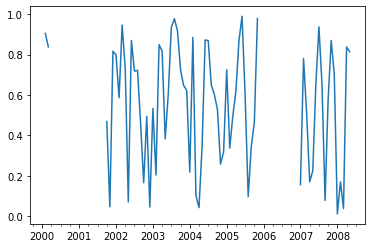

In [116]:
ts.plot()

In [117]:
ts.interpolate()

2000-02-29    0.904569
2000-03-31    0.837959
2000-04-30    0.818495
2000-05-31    0.799032
2000-06-30    0.779568
2000-07-31    0.760104
2000-08-31    0.740641
2000-09-30    0.721177
2000-10-31    0.701714
2000-11-30    0.682250
2000-12-31    0.662786
2001-01-31    0.643323
2001-02-28    0.623859
2001-03-31    0.604396
2001-04-30    0.584932
2001-05-31    0.565468
2001-06-30    0.546005
2001-07-31    0.526541
2001-08-31    0.507078
2001-09-30    0.487614
2001-10-31    0.468150
2001-11-30    0.046648
2001-12-31    0.816420
2002-01-31    0.798148
2002-02-28    0.586649
2002-03-31    0.945626
2002-04-30    0.732297
2002-05-31    0.071166
2002-06-30    0.869249
2002-07-31    0.717896
                ...   
2005-12-31    0.918848
2006-01-31    0.860199
2006-02-28    0.801550
2006-03-31    0.742901
2006-04-30    0.684253
2006-05-31    0.625604
2006-06-30    0.566955
2006-07-31    0.508306
2006-08-31    0.449658
2006-09-30    0.391009
2006-10-31    0.332360
2006-11-30    0.273711
2006-12-31 

In [118]:
ts.interpolate().count()

100

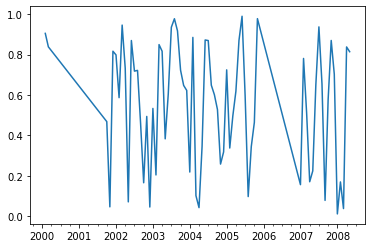

In [119]:
ts.interpolate().plot()

Index aware interpolation is available via the method keyword:

In [126]:
ts2 = ts.interpolate().head(6).copy()
ts2['2000-03-31'] = np.nan
ts2['2000-06-30'] = np.nan

In [127]:
ts2

2000-02-29    0.904569
2000-03-31         NaN
2000-04-30    0.818495
2000-05-31    0.799032
2000-06-30         NaN
2000-07-31    0.760104
Freq: M, dtype: float64

In [128]:
ts2.interpolate()

2000-02-29    0.904569
2000-03-31    0.861532
2000-04-30    0.818495
2000-05-31    0.799032
2000-06-30    0.779568
2000-07-31    0.760104
Freq: M, dtype: float64

In [129]:
ts2.interpolate(method='time')

2000-02-29    0.904569
2000-03-31    0.860826
2000-04-30    0.818495
2000-05-31    0.799032
2000-06-30    0.779887
2000-07-31    0.760104
Freq: M, dtype: float64

For a floating-point index, use method='values':

In [132]:
ser = pd.Series([0.0, np.nan, 10.0], index=[0.0, 1.0, 10.0])

In [133]:
ser

0.0      0.0
1.0      NaN
10.0    10.0
dtype: float64

In [134]:
ser.interpolate()

0.0      0.0
1.0      5.0
10.0    10.0
dtype: float64

In [135]:
ser.interpolate(method='values')

0.0      0.0
1.0      1.0
10.0    10.0
dtype: float64

You can also interpolate with a DataFrame:

In [136]:
df = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
                    'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})

In [137]:
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [138]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


The method argument gives access to fancier interpolation methods. If you have scipy installed, you can pass the name of a 1-d interpolation routine to method. You’ll want to consult the full scipy interpolation documentation and reference guide for details. The appropriate interpolation method will depend on the type of data you are working with.

If you are dealing with a time series that is growing at an increasing rate, method='quadratic' may be appropriate.
If you have values approximating a cumulative distribution function, then method='pchip' should work well.
To fill missing values with goal of smooth plotting, consider method='akima'.

> Warning These methods require scipy.

In [139]:
df.interpolate(method='barycentric')

,A,B
0,1.00,0.250
1,2.10,-7.660
2,3.53,-4.515
3,4.70,4.000
4,5.60,12.200
5,6.80,14.400


In [140]:
df.interpolate(method='pchip')

,A,B
0,1.00000,0.250000
1,2.10000,0.672808
2,3.43454,1.928950
3,4.70000,4.000000
4,5.60000,12.200000
5,6.80000,14.400000


In [141]:
df.interpolate(method='akima')

,A,B
0,1.000000,0.250000
1,2.100000,-0.873316
2,3.406667,0.320034
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


When interpolating via a polynomial or spline approximation, you must also specify the degree or order of the approximation:

In [142]:
df.interpolate(method='spline', order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-0.428598
2,3.404545,1.206900
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [143]:
df.interpolate(method='polynomial', order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-2.703846
2,3.451351,-1.453846
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


Compare several methods:

In [144]:
np.random.seed(2)
ser = pd.Series(np.arange(1, 10.1, .25) ** 2 + np.random.randn(37))
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[missing] = np.nan
methods = ['linear', 'quadratic', 'cubic']

In [145]:
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})

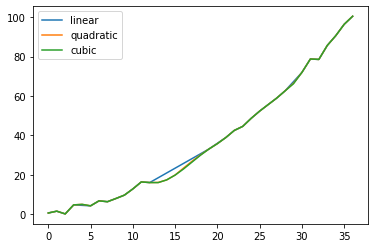

In [146]:
df.plot()

Another use case is interpolation at new values. Suppose you have 100 observations from some distribution. And let’s suppose that you’re particularly interested in what’s happening around the middle. You can mix pandas’ reindex and interpolate methods to interpolate at the new values.

In [147]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))

In [148]:
new_index = ser.index | pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75])

In [149]:
interp_s = ser.reindex(new_index).interpolate(method='pchip')

In [150]:
interp_s[49:51]

49.00    0.471410
49.25    0.476841
49.50    0.481780
49.75    0.485998
50.00    0.489266
50.25    0.491814
50.50    0.493995
50.75    0.495763
51.00    0.497074
dtype: float64

### Interpolation limits

Like other pandas fill methods, interpolate() accepts a limit keyword argument. Use this argument to limit the number of consecutive NaN values filled since the last valid observation:

By default, NaN values are filled in a forward direction. Use limit_direction parameter to fill backward or from both directions.

By default, NaN values are filled whether they are inside (surrounded by) existing valid values, or outside existing valid values. Introduced in v0.23 the limit_area parameter restricts filling to either inside or outside values.

## Replacing generic values

Often times we want to replace arbitrary values with other values.

replace() in Series and replace() in DataFrame provides an efficient yet flexible way to perform such replacements.

For a Series, you can replace a single value or a list of values by another value:

In [151]:
ser = pd.Series([0., 1., 2., 3., 4.])

In [153]:
ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [152]:
ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

You can replace a list of values by a list of other values:

In [154]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

You can also specify a mapping dict:

In [156]:
ser.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

For a DataFrame, you can specify individual values by column:

In [157]:
df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})

In [158]:
df.replace({'a': 0, 'b': 5}, 100)

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


Instead of replacing with specified values, you can treat all given values as missing and interpolate over them:

In [159]:
ser.replace([1, 2, 3], method='pad')

0    0.0
1    0.0
2    0.0
3    0.0
4    4.0
dtype: float64

## String/regular expression replacement

> Note: Python strings prefixed with the r character such as r'hello world' are so-called “raw” strings. They have different semantics regarding backslashes than strings without this prefix. Backslashes in raw strings will be interpreted as an escaped backslash, e.g., r'\' == '\\'. You should read about them if this is unclear.

Replace the ‘.’ with NaN (str -> str):

In [161]:
d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']}
df = pd.DataFrame(d)

In [162]:
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [163]:
df.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


Now do it with a regular expression that removes surrounding whitespace (regex -> regex):

In [164]:
df.replace(r'\s*\.\s*', np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


Replace a few different values (list -> list):

In [165]:
df.replace(['a', '.'], ['b', np.nan])

,a,b,c
0,0,b,b
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


list of regex -> list of regex:

In [166]:
df.replace([r'\.', r'(a)'], ['dot', r'\1stuff'], regex=True)

,a,b,c
0,0,astuff,astuff
1,1,b,b
2,2,dot,NaN
3,3,dot,d


Only search in column 'b' (dict -> dict):

In [167]:
df.replace({'b': '.'}, {'b': np.nan})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


Same as the previous example, but use a regular expression for searching instead (dict of regex -> dict):

In [168]:
df.replace({'b': r'\s*\.\s*'}, {'b': np.nan}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


You can pass nested dictionaries of regular expressions that use regex=True:

In [169]:
df.replace({'b': {'b': r''}}, regex=True)

,a,b,c
0,0,a,a
1,1,,b
2,2,.,NaN
3,3,.,d


Alternatively, you can pass the nested dictionary like so:

In [170]:
df.replace(regex={'b': {r'\s*\.\s*': np.nan}})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


You can also use the group of a regular expression match when replacing (dict of regex -> dict of regex), this works for lists as well.

In [171]:
df.replace({'b': r'\s*(\.)\s*'}, {'b': r'\1ty'}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,.ty,NaN
3,3,.ty,d


You can pass a list of regular expressions, of which those that match will be replaced with a scalar (list of regex -> regex).

In [172]:
df.replace([r'\s*\.\s*', r'a|b'], np.nan, regex=True)

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


All of the regular expression examples can also be passed with the to_replace argument as the regex argument. In this case the value argument must be passed explicitly by name or regex must be a nested dictionary. The previous example, in this case, would then be:

In [173]:
df.replace(regex=[r'\s*\.\s*', r'a|b'], value=np.nan)

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


This can be convenient if you do not want to pass regex=True every time you want to use a regular expression.

> Note: Anywhere in the above replace examples that you see a regular expression a compiled regular expression is valid as well.

## Numeric replacement

replace() is similar to fillna().

In [175]:
df = pd.DataFrame(np.random.randn(10, 2))

In [176]:
df[np.random.rand(df.shape[0]) > 0.5] = 1.5

In [177]:
df

,0,1
0,0.126504,-1.418811
1,-0.251774,-1.546675
2,1.500000,1.500000
3,0.970861,1.792593
4,1.500000,1.500000
5,0.697416,0.601516
6,0.003659,-0.228248
7,-2.069612,0.610144
8,1.500000,1.500000
9,1.500000,1.500000


In [178]:
df.replace(1.5, np.nan)

,0,1
0,0.126504,-1.418811
1,-0.251774,-1.546675
2,NaN,NaN
3,0.970861,1.792593
4,NaN,NaN
5,0.697416,0.601516
6,0.003659,-0.228248
7,-2.069612,0.610144
8,NaN,NaN
9,NaN,NaN


Replacing more than one value is possible by passing a list.

In [179]:
df00 = df.iloc[0, 0]

In [180]:
df.replace([1.5, df00], [np.nan, 'a'])

,0,1
0,a,-1.41881
1,-0.251774,-1.54667
2,NaN,NaN
3,0.970861,1.79259
4,NaN,NaN
5,0.697416,0.601516
6,0.00365949,-0.228248
7,-2.06961,0.610144
8,NaN,NaN
9,NaN,NaN


You can also operate on the DataFrame in place:

In [181]:
df.replace(1.5, np.nan, inplace=True)

### Missing data casting rules and indexing

While pandas supports storing arrays of integer and boolean type, these types are not capable of storing missing data. Until we can switch to using a native NA type in NumPy, we’ve established some “casting rules”. When a reindexing operation introduces missing data, the Series will be cast according to the rules introduced in the table below.

<table border="1" class="colwidths-given docutils">
<colgroup>
<col width="50%">
<col width="50%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">data type</th>
<th class="head">Cast to</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>integer</td>
<td>float</td>
</tr>
<tr class="row-odd"><td>boolean</td>
<td>object</td>
</tr>
<tr class="row-even"><td>float</td>
<td>no cast</td>
</tr>
<tr class="row-odd"><td>object</td>
<td>no cast</td>
</tr>
</tbody>
</table>

For example:

In [182]:
s = pd.Series(np.random.randn(5), index=[0, 2, 4, 6, 7])

In [183]:
s > 0

0    False
2     True
4     True
6     True
7     True
dtype: bool

In [184]:
(s > 0).dtype

dtype('bool')

In [185]:
crit = (s > 0).reindex(list(range(8)))

In [186]:
crit

0    False
1      NaN
2     True
3      NaN
4     True
5      NaN
6     True
7     True
dtype: object

In [187]:
crit.dtype

dtype('O')

Ordinarily NumPy will complain if you try to use an object array (even if it contains boolean values) instead of a boolean array to get or set values from an ndarray (e.g. selecting values based on some criteria). If a boolean vector contains NAs, an exception will be generated:

In [188]:
reindexed = s.reindex(list(range(8))).fillna(0)

In [189]:
reindexed

0   -0.447501
1    0.000000
2    0.241440
3    0.000000
4    0.497426
5    0.000000
6    4.108693
7    0.821121
dtype: float64

In [190]:
reindexed[crit]

ValueError: cannot index with vector containing NA / NaN values

However, these can be filled in using fillna() and it will work fine:

In [191]:
reindexed[crit.fillna(False)]

2    0.241440
4    0.497426
6    4.108693
7    0.821121
dtype: float64

In [192]:
reindexed[crit.fillna(True)]

1    0.000000
2    0.241440
3    0.000000
4    0.497426
5    0.000000
6    4.108693
7    0.821121
dtype: float64